# Code for running SiameseNet and TripletNet on BRACOL Dataset

***The code used in this notebook is mostly from [this](https://github.com/adambielski/siamese-triplet/). If you are interested in it, check it out, it is extremely well documented***

***Install libs***

In [1]:
#!pip install learn2learn
#!pip install efficientnet_pytorch
#!pip install transformers
#pip install timm
from IPython.display import clear_output 
# clear_output()

print('Done!')

Done!


***Import some libs***

In [2]:
import sys
#sys.path.insert(0, '/content/drive/MyDrive/pg/siamese_triplet_net/src/')
#sys.path.insert(0,'C:/Users/Mey/Documents/pg-coffee-main/siamese_triplet_net/src/')
sys.path.insert(0,'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from losses import TripletLoss
from trainer import fit
import torchvision

from IPython.display import clear_output 
 
import timm
 



C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


***Define model hiperparams***

In [3]:
#from CustomViT import CustomViT
# model & optimizer & lr_scheduler

 
# مدل Siamese و ViT
embedding_net = MobileNetv2()
siamese_model = TripletNet(embedding_net=embedding_net)
#vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
#feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')


#embedding_net = ViTEmbeddingNet()
#model = TripletNet(embedding_net=embedding_net)

#model = CustomViT(num_classes=15)

#====این قسمت به صورت موقت برای لود امبدینگ مدل آموزش داده شده قبلی بر روی پلنت ویلج به کار میرود
#import torch
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_NFNet_15Shot.h5",map_location=torch.device('cpu'))
#model.load_state_dict(torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_NFNet_15Shot.h5",map_location=torch.device('cpu')) )
#Wmodel.eval()
#============================
optimizer = torch.optim.SGD(siamese_model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
loss_fn = TripletLoss(1.)
n_epochs=1 #100
device = torch.cuda.is_available()
if device:
    siamese_model.cuda()
    vit_model.cuda()

log_interval =1  # 100

# path to data
#path_data = '/content/drive/MyDrive/pg/dataset/'
path_data='C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'

# define siamese train and val loaders
# this loader is implemented for datasets in ImageFolder format (https://pytorch.org/vision/stable/datasets.html#imagefolder)
triplet_train_loader = get_triplet_dataloader(root=path_data + '/train/', batch_size=5, transforms=get_train_transforms())
triplet_val_loader = get_triplet_dataloader(root=path_data + '/val/', batch_size=5, transforms=get_val_transforms())

 

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
fit(triplet_train_loader, triplet_val_loader, siamese_model,  loss_fn, optimizer, lr_scheduler, n_epochs, device, log_interval)

Train: [0/225 (0%)]	Loss: 1.001213
Train: [5/225 (2%)]	Loss: 0.758311
Train: [10/225 (4%)]	Loss: 0.675892
Train: [15/225 (7%)]	Loss: 1.015013
Train: [20/225 (9%)]	Loss: 0.919476
Train: [25/225 (11%)]	Loss: 0.848059
Train: [30/225 (13%)]	Loss: 1.003633
Train: [35/225 (16%)]	Loss: 0.820203
Train: [40/225 (18%)]	Loss: 0.882542
Train: [45/225 (20%)]	Loss: 0.920179
Train: [50/225 (22%)]	Loss: 0.836516
Train: [55/225 (24%)]	Loss: 0.769974
Train: [60/225 (27%)]	Loss: 0.685950
Train: [65/225 (29%)]	Loss: 0.797329
Train: [70/225 (31%)]	Loss: 0.937688
Train: [75/225 (33%)]	Loss: 0.857100
Train: [80/225 (36%)]	Loss: 0.756416
Train: [85/225 (38%)]	Loss: 0.911791
Train: [90/225 (40%)]	Loss: 0.955991
Train: [95/225 (42%)]	Loss: 0.818388
Train: [100/225 (44%)]	Loss: 0.836766
Train: [105/225 (47%)]	Loss: 0.932830
Train: [110/225 (49%)]	Loss: 0.911702
Train: [115/225 (51%)]	Loss: 0.904737
Train: [120/225 (53%)]	Loss: 0.861895
Train: [125/225 (56%)]	Loss: 0.843991
Train: [130/225 (58%)]	Loss: 0.876356
T

In [5]:
# from: https://github.com/avilash/pytorch-siamese-triplet/blob/master/tsne.py
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
# استخراج ویژگی‌ها با استفاده از مدل Siamese
#def generate_embeddings(data_loader, model):
#    with torch.no_grad():
#        #device = 'cuda'
#        model.eval()
#        #model.to(device)
#        labels = None
#        embeddings = None
#        for batch_idx, data in tqdm(enumerate(data_loader)):
#            batch_imgs, batch_labels = data
#            batch_labels = batch_labels.numpy()
#           # batch_imgs = Variable(batch_imgs.to('cuda'))
#            batch_E = model.get_embedding(batch_imgs)
#            batch_E = batch_E.data.cpu().numpy()
#            embeddings = np.concatenate((embeddings, batch_E), axis=0) if embeddings is not None else batch_E
#            labels = np.concatenate((labels, batch_labels), axis=0) if labels is not None else batch_labels
#    return embeddings, labels
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        #device = 'cuda'
        model.eval()
        #model.to(device)
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')



In [6]:
import torch
torch.save(siamese_model, "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_Mobilenet_15ShotVit4.h5" )
#===قسمت زیر به صورت موقت غیر فعال شد آنرا برگردانیم
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese.h5",map_location=torch.device('cpu'))
#model.eval()
#======
path_data='C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


IndexError: list index out of range

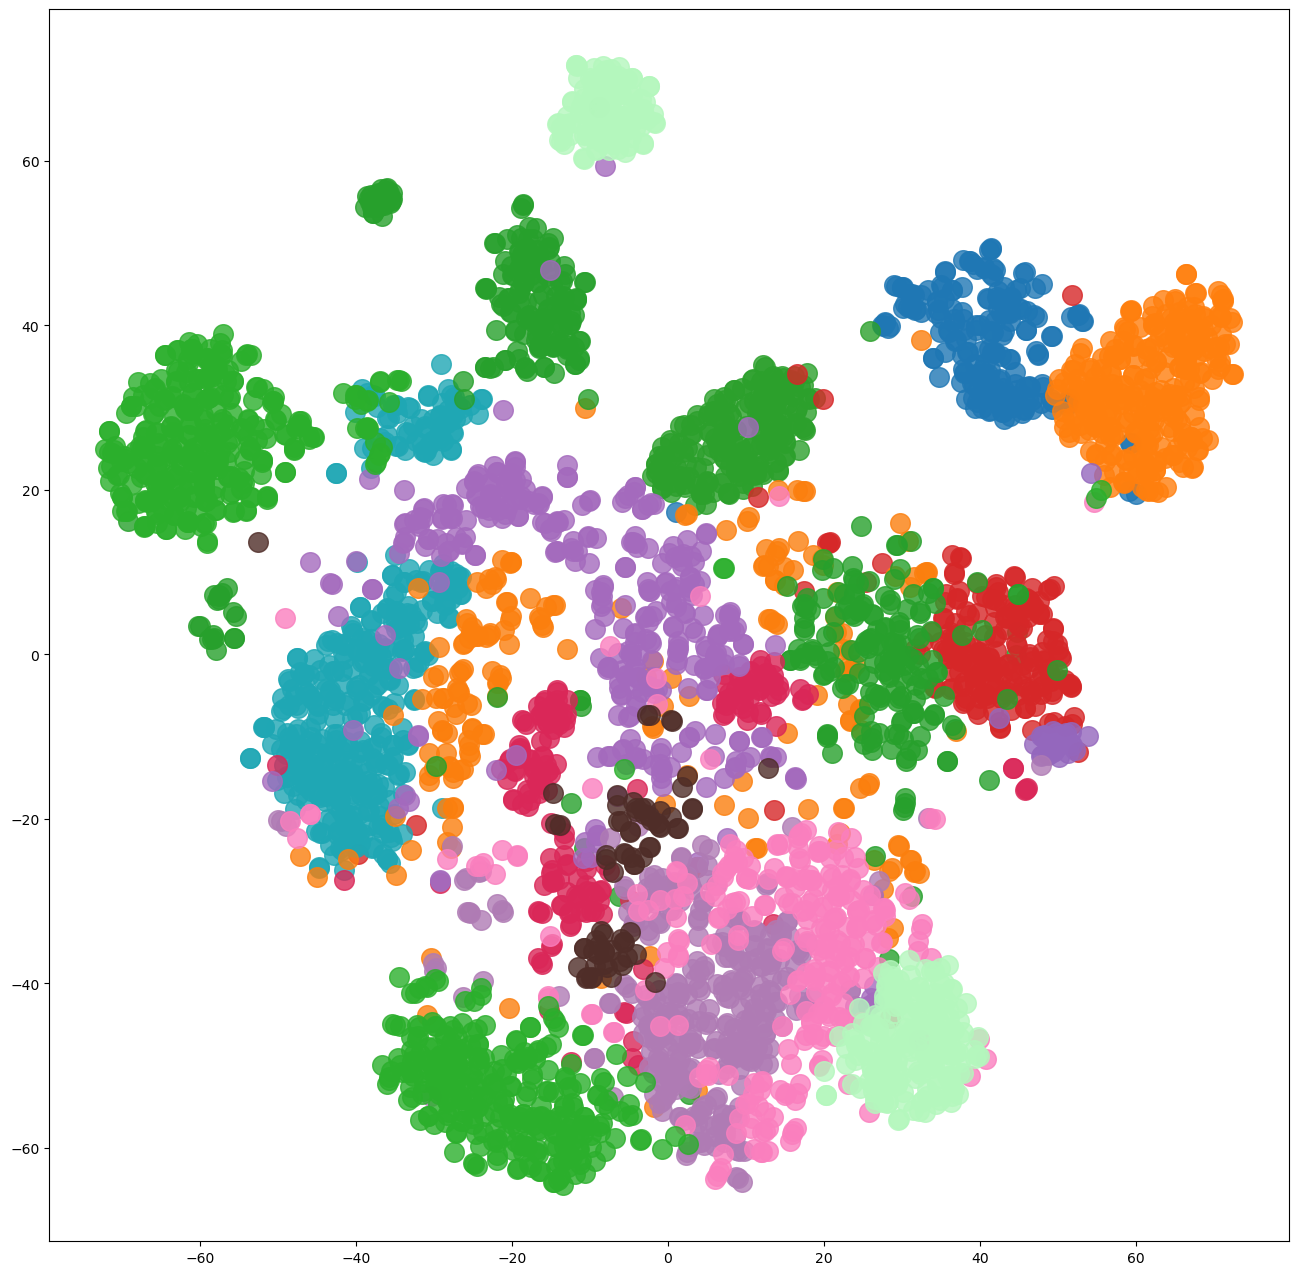

In [7]:
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, siamese_model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

In [16]:
train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
 
# استخراج ویژگی‌ها از داده‌های آموزش
train_embeddings, train_labels = generate_embeddings(train_loader, siamese_model )
# استخراج ویژگی‌ها از داده‌های تست
test_embeddings, test_labels = generate_embeddings(test_loader, siamese_model )
 




In [28]:
import torch
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import accuracy_score, f1_score
from transformers import ViTForImageClassification, ViTConfig

# فرض کنید که embedding های شما به صورت tensor با ابعاد [batch_size, embedding_dim] است
# همچنین فرض می‌کنیم که تعداد کلاس‌ها مشخص است
num_classes = 15  # تعداد کلاس‌ها 

# 1. بارگذاری مدل ViT با حذف لایه‌های ابتدایی
class CustomViT(nn.Module):
    def __init__(self, original_vit_model, embedding_dim, num_classes):
        super(CustomViT, self).__init__()
        # حذف لایه‌های ابتدایی
        self.vit = nn.Sequential(*list(original_vit_model.children())[2:])  # لایه‌های ابتدایی حذف شده
        #self.fc = nn.Linear(embedding_dim, num_classes)  # لایه نهایی برای طبقه‌بندی
        self.fc = nn.Linear(1280, num_classes)  # لایه نهایی برای طبقه‌بندی

    def forward(self, x):
        x = self.vit(x)
        x = self.fc(x)
        return x

# 2. بارگذاری مدل ViT از Hugging Face
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=num_classes, ignore_mismatched_sizes=True)
vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, num_classes)



embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
model = CustomViT(vit_model, embedding_dim, num_classes)
print("embedding_dim:")
print(embedding_dim)
# 3. فرض کنیم داده‌های شما به شکل X_train (embedding) و y_train (برچسب‌ها) است
# و همچنین داده‌های اعتبارسنجی X_val و y_val
#X_train, y_train = torch.randn(64, embedding_dim), torch.randint(0, num_classes, (64,))
#X_val, y_val = torch.randn(32, embedding_dim), torch.randint(0, num_classes, (32,))
X_train, y_train =train_embeddings, train_labels
X_val, y_val =test_embeddings, test_labels

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# 4. آموزش مدل
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.cuda.is_available()
if device:
    model.cuda()
#model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# آموزش
model.train()
for epoch in range(10):  # تعداد epochs
    optimizer.zero_grad()
    #outputs = model(X_train.to(device))
    outputs = model(X_train_tensor )
    #loss = criterion(outputs, y_train.to(device))
    loss = criterion(outputs, y_train_tensor )
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')

# 5. ارزیابی مدل
model.eval()
with torch.no_grad():
    #val_outputs = model(X_val.to(device))
    val_outputs = model(X_val_tensor)
    _, predicted = torch.max(val_outputs.data, 1)

# محاسبه دقت و امتیاز F1
#accuracy = accuracy_score(y_val.cpu(), predicted.cpu())
accuracy = accuracy_score(y_val_tensor, predicted )
#f1 = f1_score(y_val.cpu(), predicted.cpu(), average='weighted')
f1 = f1_score(y_val_tensor, predicted , average='weighted')
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([15]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([15, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


embedding_dim:
768
Epoch [1/10], Loss: 2.7051
Epoch [2/10], Loss: 2.7041
Epoch [3/10], Loss: 2.7031
Epoch [4/10], Loss: 2.7021
Epoch [5/10], Loss: 2.7011
Epoch [6/10], Loss: 2.7001
Epoch [7/10], Loss: 2.6990
Epoch [8/10], Loss: 2.6980
Epoch [9/10], Loss: 2.6970
Epoch [10/10], Loss: 2.6960
Accuracy: 0.1342, F1 Score: 0.0649


In [61]:

input_embedding = test_embeddings 
labels = test_labels

print(input_embedding.shape) 
# Check the type and shape of input_embedding
print(type(input_embedding))
print(input_embedding.shape)

# Convert to tensor if necessary
if not isinstance(input_embedding, torch.Tensor):
    input_embedding = torch.tensor(input_embedding)
    print(type(input_embedding))
    print(input_embedding.shape)

# اضافه کردن پدینگ به ورودی
padding_size = 64  # مقدار پدینگ مورد نیاز برای هر طرف
input_embedding = F.pad(input_embedding, (0, padding_size))

print(input_embedding.shape)  # بررسی شکل جدید ورودی

# تغییر شکل به [batch_size, channels, height, width]
input_embedding = input_embedding.view(4121, 1, 1, 1344)

# تغییر اندازه به 224x224
input_embedding = F.interpolate(input_embedding, size=(224, 224), mode='bilinear', align_corners=False)

# تغییر شکل به [batch_size, channels, height, width]
input_embedding = input_embedding.view(4121, 1, 224, 224)

# تکرار کانال‌ها برای تبدیل به 3 کانال
input_embedding = input_embedding.repeat(1, 3, 1, 1)

print(input_embedding.shape)  # بررسی شکل جدید ورودی


 

    

(4121, 1280)
<class 'numpy.ndarray'>
(4121, 1280)
<class 'torch.Tensor'>
torch.Size([4121, 1280])
torch.Size([4121, 1344])
torch.Size([4121, 3, 224, 224])


RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2493963264 bytes.

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 131.5/131.5 kB 235.0 kB/s eta 0:00:00
     -------------------------------------- 43.2/43.2 kB 422.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.3/2.3 MB 450.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
